In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [11]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [12]:
path = r'C:\Users\ms207\Desktop\CF\6\Data'

In [13]:
df = pd.read_csv(os.path.join(path, 'newupdated.csv'))

In [14]:
df.shape

(300, 61)

In [15]:
df.head()

,month_date_yyyymm,cbsa_code,alabama,alaska,arizona,arkansas,california,colorado,connecticut,deleware,...,hotness_rank_mm,hotness_rank_yy,hotness_score,supply_score,demand_score,median_days_on_market,median_days_on_market_yy,median_dom_vs_us,median_listing_price,median_listing_price_vs_us
0,202204,24860,0,0,0,0,0,0,0,0,...,-21,85,45.986622,34.448161,57.525084,36,-0.339450,2,349500,0.8224
1,202204,36260,0,0,0,0,0,0,0,0,...,-30,-94,51.337793,86.287625,16.387960,21,1.333333,-13,569000,1.3388
2,202204,23060,0,0,0,0,0,0,0,0,...,2,28,85.785953,79.264214,92.307692,24,-0.351351,-10,270000,0.6353
3,202204,29100,0,0,0,0,0,0,0,0,...,-3,8,95.986622,93.979933,97.993311,16,-0.319149,-18,340000,0.8000
4,202204,31420,0,0,0,0,0,0,0,0,...,-63,-12,31.772575,41.137124,22.408027,34,-0.093333,0,209000,0.4918


In [16]:
df.rename(columns = {'month_date_yyyymm' : 'Date'}, inplace = True)

In [17]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [18]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-13373273147123.736,
 -5356307839338.395,
 -2494283219232.3345,
 -1574287878386.036,
 -980791065510.2255,
 -680583675332.2944,
 -508786784144.6482,
 -379316116732.8285,
 -289599786256.1757]

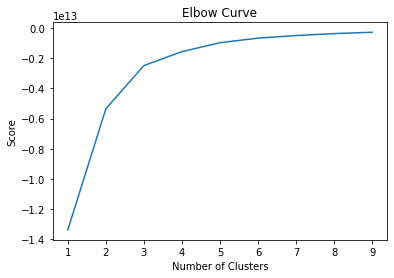

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# curve started to straighten out at 5

In [20]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5, n_jobs = -1) 

In [21]:
# Fit the k-means object to the data.

kmeans.fit(df)

D:\ana\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=5, n_jobs=-1)

In [22]:
df['clusters'] = kmeans.fit_predict(df)

D:\ana\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [23]:
df.head()

,Date,cbsa_code,alabama,alaska,arizona,arkansas,california,colorado,connecticut,deleware,...,hotness_rank_yy,hotness_score,supply_score,demand_score,median_days_on_market,median_days_on_market_yy,median_dom_vs_us,median_listing_price,median_listing_price_vs_us,clusters
0,202204,24860,0,0,0,0,0,0,0,0,...,85,45.986622,34.448161,57.525084,36,-0.339450,2,349500,0.8224,0
1,202204,36260,0,0,0,0,0,0,0,0,...,-94,51.337793,86.287625,16.387960,21,1.333333,-13,569000,1.3388,4
2,202204,23060,0,0,0,0,0,0,0,0,...,28,85.785953,79.264214,92.307692,24,-0.351351,-10,270000,0.6353,2
3,202204,29100,0,0,0,0,0,0,0,0,...,8,95.986622,93.979933,97.993311,16,-0.319149,-18,340000,0.8000,0
4,202204,31420,0,0,0,0,0,0,0,0,...,-12,31.772575,41.137124,22.408027,34,-0.093333,0,209000,0.4918,2


In [25]:
df.columns

Index(['Date', 'cbsa_code', 'alabama', 'alaska', 'arizona', 'arkansas',
       'california', 'colorado', 'connecticut ', 'deleware', 'florida',
       'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'kansas',
       'kentucky', 'louisiana', 'maine', 'maryland', 'massachusetts',
       'michigan', 'minnessotta', 'mississippi', 'missouri', 'montana ',
       'nebraska', 'nevada', 'new hampshire', 'new jersey', 'new mexico',
       'new york', 'north carolina ', 'north dakota', 'ohio ', 'oklahoma',
       'oregon', 'pennsylvania', 'south carolina', 'south dakota', 'tennessee',
       'texas', 'utah ', 'vermont', 'virginia', 'washington', 'west virgina',
       'wisconsin', 'nielsen_hh_rank', 'hotness_rank', 'hotness_rank_mm',
       'hotness_rank_yy', 'hotness_score', 'supply_score', 'demand_score',
       'median_days_on_market', 'median_days_on_market_yy', 'median_dom_vs_us',
       'median_listing_price', 'median_listing_price_vs_us', 'clusters'],
      dtype='object')

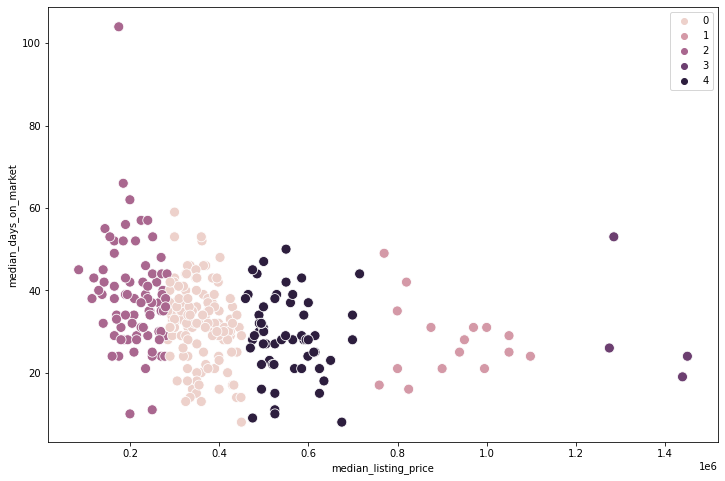

In [27]:


plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['median_listing_price'], y=df['median_days_on_market'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('median_listing_price') # Label x-axis.
plt.ylabel('median_days_on_market') # Label y-axis.
plt.show()

# clusters make sense by showing what to expect in each price range. The chart broken out this way is showing where the most demand is in the range.  

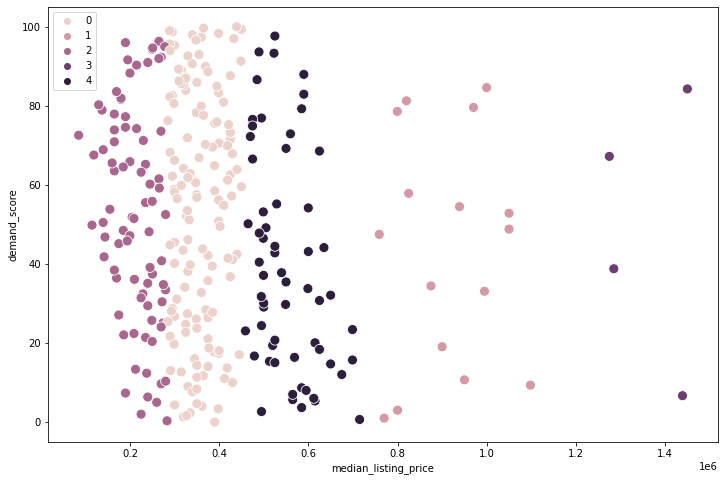

In [28]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['median_listing_price'], y=df['demand_score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('median_listing_price') 
plt.ylabel('demand_score') 
plt.show()

In [29]:
df.loc[df['clusters'] == 4, 'cluster'] = 'yellow'
df.loc[df['clusters'] == 3, 'cluster'] = 'blue'
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [30]:
df.groupby('cluster').agg({'median_listing_price':['mean', 'median'], 
                         'median_days_on_market':['mean', 'median'], 
                         'demand_score':['mean', 'median']})

median_listing_price          median_days_on_market         \
                            mean   median                  mean median   
cluster                                                                  
blue                1.362250e+06  1362000             30.500000   25.0   
dark purple         2.133766e+05   215000             38.283951   38.0   
pink                3.563046e+05   349999             32.100719   32.0   
purple              9.125443e+05   919500             27.875000   26.5   
yellow              5.526727e+05   534500             28.683333   28.0   

            demand_score             
                    mean     median  
cluster                              
blue           49.247492  53.010033  
dark purple    52.533135  51.839465  
pink           53.595919  57.525084  
purple         43.520067  48.160535  
yellow         40.027871  34.615385

#  In the future I would want to check DOM with price rangs versus the median. 